<a href="https://colab.research.google.com/github/simsekergun/Resolution/blob/main/notebooks/Resolution_mse_vs_N_FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error
from google.colab import files

In [2]:
# Multilayer Perceptron
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import concatenate
from tensorflow.keras import optimizers
from tensorflow.keras import backend
from keras.layers import LeakyReLU, PReLU
from tensorflow.keras.metrics import categorical_accuracy

In [3]:
df_m = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/datasets/Es_measured.csv',header=None)
df_r = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/datasets/Es_real.csv',header=None)
df_m.shape, df_r.shape

((2330, 110), (2330, 100))

In [4]:
df_mmax = max(df_m.max())
df_rmax = max(df_r.max())

In [5]:
X = df_m/df_mmax
y = df_r/df_rmax

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
X_train.shape, X_test.shape, y_train.shape

((1631, 110), (699, 110), (1631, 100))

In [7]:
Ns = [50, 100, 150, 200, 250, 300, 400, 500, 800, 1000, 1300, 1600]

In [8]:
# FCNN parameters
ac = 'ReLU'  # activation function
nnno = 1000    # number of neurons
dr_rate = 0.2  # dropout rate
EPOCHS = 200    # number of epocs
LR = 0.001     # learning rate
ninput=110
noutput=100

In [9]:
mean_errors = np.zeros(len(Ns))
for i in range(len(Ns)):  
  visible = Input(shape=(ninput,))
  hidden1 = Dense(nnno, activation=ac)(visible)
  hidden1 = Dropout(dr_rate)(hidden1)
  hidden2 = Dense(nnno, activation=ac)(hidden1)
  hidden2 = Dropout(dr_rate)(hidden2)
  hidden3 = Dense(nnno, activation=ac)(hidden2)
  hidden3 = Dropout(dr_rate)(hidden3)
  hidden4 = Dense(nnno, activation=ac)(hidden3)
  hidden4 = Dropout(dr_rate)(hidden4)
  predicted_value = Dense(noutput)(hidden4)
  modelANN = Model(inputs=visible, outputs=predicted_value)
  opt = optimizers.Adamax(learning_rate=LR)    
  modelANN.compile(optimizer=opt, loss=['mse'])
  history = modelANN.fit(X_train[:Ns[i]], y_train[:Ns[i]],epochs=EPOCHS, validation_data = (X_test,y_test), verbose=0)
  y_pred = modelANN.predict(X_test)
  mean_errors[i] = mean_squared_error(y_pred, y_test)
  del modelANN

22/22 [==============================] - 0s 3ms/step


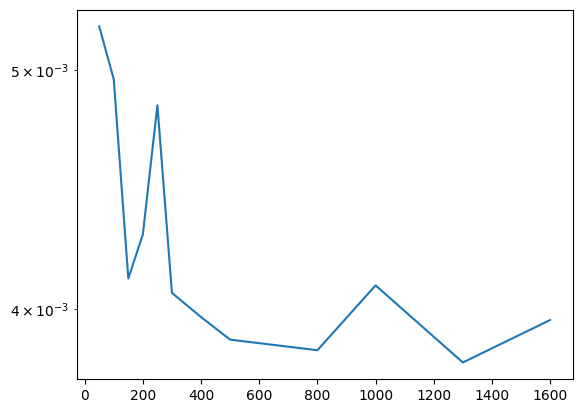

In [10]:
plt.plot(Ns,mean_errors)
plt.yscale("log")
plt.show()

In [11]:
mean_errors

array([0.0052096 , 0.00495807, 0.00411478, 0.00428801, 0.00483931,
       0.00405982, 0.00396914, 0.00388603, 0.00384769, 0.00408852,
       0.00380386, 0.00395808])